In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read CSV file into a DataFrame
df = pd.read_csv('Student.csv')

# Display the first few rows of the DataFrame
df.head()


,Student_ID,Student_Age,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,STUDENT1,19-22,Male,State,50%,Yes,No,Private,12,Always,Yes,Yes,No,No,A
1,STUDENT2,19-22,Male,State,50%,Yes,No,Private,12,Always,Yes,No,Yes,Yes,A
2,STUDENT3,19-22,Male,State,50%,No,No,Private,12,Never,No,No,No,Yes,A
3,STUDENT4,18,Female,Private,50%,Yes,No,Bus,12,Always,No,Yes,No,No,A
4,STUDENT5,19-22,Male,Private,50%,No,No,Bus,12,Always,Yes,No,Yes,Yes,A


In [3]:
df.head()

,Student_ID,Student_Age,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,STUDENT1,19-22,Male,State,50%,Yes,No,Private,12,Always,Yes,Yes,No,No,A
1,STUDENT2,19-22,Male,State,50%,Yes,No,Private,12,Always,Yes,No,Yes,Yes,A
2,STUDENT3,19-22,Male,State,50%,No,No,Private,12,Never,No,No,No,Yes,A
3,STUDENT4,18,Female,Private,50%,Yes,No,Bus,12,Always,No,Yes,No,No,A
4,STUDENT5,19-22,Male,Private,50%,No,No,Bus,12,Always,Yes,No,Yes,Yes,A


In [4]:
df.drop('Student_ID',axis=1,inplace=True)
df.drop('Scholarship',axis=1,inplace=True)
df.head()

,Student_Age,Sex,High_School_Type,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,19-22,Male,State,Yes,No,Private,12,Always,Yes,Yes,No,No,A
1,19-22,Male,State,Yes,No,Private,12,Always,Yes,No,Yes,Yes,A
2,19-22,Male,State,No,No,Private,12,Never,No,No,No,Yes,A
3,18,Female,Private,Yes,No,Bus,12,Always,No,Yes,No,No,A
4,19-22,Male,Private,No,No,Bus,12,Always,Yes,No,Yes,Yes,A


In [5]:
# check for missing values

df.isnull().sum()

Student_Age           0
Sex                   0
High_School_Type      0
Additional_Work       0
Sports_activity       0
Transportation        0
Weekly_Study_Hours    0
Attendance            0
Reading               0
Notes                 0
Listening_in_Class    0
Project_work          0
Grade                 0
dtype: int64

In [6]:
# check for duplicates
df.duplicated().sum()

96

In [7]:
df.describe()

,Weekly_Study_Hours
count,399.000000
mean,4.952381
std,4.630599
min,0.000000
25%,0.000000
50%,4.000000
75%,8.000000
max,12.000000


## Convert Student_age range values to single value 

In [8]:
# Function to convert age ranges to mean values
def age_range_to_mean(age_range):
    if isinstance(age_range, str) and '-' in age_range:
        start, end = map(int, age_range.split('-'))
        return (start + end) / 2
    elif isinstance(age_range, str):
        return int(age_range)
    else:
        return int(age_range)

# Apply the function to the 'Student_Age' column
df['Student_Age'] = df['Student_Age'].apply(age_range_to_mean)
# Assuming df is your DataFrame

# Convert 'Student_Age' column to integers
df['Student_Age'] = df['Student_Age'].astype(int)

df


,Student_Age,Sex,High_School_Type,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,20,Male,State,Yes,No,Private,12,Always,Yes,Yes,No,No,A
1,20,Male,State,Yes,No,Private,12,Always,Yes,No,Yes,Yes,A
2,20,Male,State,No,No,Private,12,Never,No,No,No,Yes,A
3,18,Female,Private,Yes,No,Bus,12,Always,No,Yes,No,No,A
4,20,Male,Private,No,No,Bus,12,Always,Yes,No,Yes,Yes,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,18,Female,State,No,No,Private,0,Sometimes,No,Yes,No,Yes,B
395,18,Male,State,Yes,Yes,Private,0,Always,Yes,No,No,No,C
396,18,Male,State,No,Yes,Private,0,Always,No,No,No,Yes,C
397,18,Female,State,Yes,Yes,Private,0,Always,No,Yes,Yes,No,C


In [9]:
combined_values = pd.concat([df['Weekly_Study_Hours'], df['Grade']])

# Extract unique values
unique_values = combined_values.unique()

print(unique_values)

[12 8 4 0 2 'A' 'B' 'C']


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Student_Age         399 non-null    int32 
 1   Sex                 399 non-null    object
 2   High_School_Type    399 non-null    object
 3   Additional_Work     399 non-null    object
 4   Sports_activity     399 non-null    object
 5   Transportation      399 non-null    object
 6   Weekly_Study_Hours  399 non-null    int64 
 7   Attendance          399 non-null    object
 8   Reading             399 non-null    object
 9   Notes               399 non-null    object
 10  Listening_in_Class  399 non-null    object
 11  Project_work        399 non-null    object
 12  Grade               399 non-null    object
dtypes: int32(1), int64(1), object(11)
memory usage: 39.1+ KB


In [11]:
df.columns

Index(['Student_Age', 'Sex', 'High_School_Type', 'Additional_Work',
       'Sports_activity', 'Transportation', 'Weekly_Study_Hours', 'Attendance',
       'Reading', 'Notes', 'Listening_in_Class', 'Project_work', 'Grade'],
      dtype='object')

## Check columns unique values

In [12]:
# Assuming df is your DataFrame

# List of columns for which you want to find unique values
columns = ['Student_Age', 'Sex', 'High_School_Type',
           'Additional_Work', 'Sports_activity', 'Transportation',
           'Weekly_Study_Hours', 'Attendance', 'Reading', 'Notes',
           'Listening_in_Class', 'Project_work', 'Grade']

# Iterate through each column and print unique values
for column in columns:
    unique_values = df[column].unique()
    print(f"Unique values for '{column}': {unique_values}")


Unique values for 'Student_Age': [20 18 25 19 21 26]
Unique values for 'Sex': ['Male' 'Female']
Unique values for 'High_School_Type': ['State' 'Private']
Unique values for 'Additional_Work': ['Yes' 'No']
Unique values for 'Sports_activity': ['No' 'Yes']
Unique values for 'Transportation': ['Private' 'Bus']
Unique values for 'Weekly_Study_Hours': [12  8  4  0  2]
Unique values for 'Attendance': ['Always' 'Never' 'Sometimes']
Unique values for 'Reading': ['Yes' 'No']
Unique values for 'Notes': ['Yes' 'No']
Unique values for 'Listening_in_Class': ['No' 'Yes']
Unique values for 'Project_work': ['No' 'Yes']
Unique values for 'Grade': ['A' 'B' 'C']


In [13]:
# Assuming df is your DataFrame

# List of columns for which you want to find unique values
columns = ['Student_Age', 'Sex', 'High_School_Type',
           'Additional_Work', 'Sports_activity', 'Transportation',
           'Weekly_Study_Hours', 'Attendance', 'Reading', 'Notes',
           'Listening_in_Class', 'Project_work', 'Grade']

# Iterate through each column and print unique values
for column in columns:
    unique_values = df[column].unique()
    print(f"Unique values for '{column}': {unique_values}")

Unique values for 'Student_Age': [20 18 25 19 21 26]
Unique values for 'Sex': ['Male' 'Female']
Unique values for 'High_School_Type': ['State' 'Private']
Unique values for 'Additional_Work': ['Yes' 'No']
Unique values for 'Sports_activity': ['No' 'Yes']
Unique values for 'Transportation': ['Private' 'Bus']
Unique values for 'Weekly_Study_Hours': [12  8  4  0  2]
Unique values for 'Attendance': ['Always' 'Never' 'Sometimes']
Unique values for 'Reading': ['Yes' 'No']
Unique values for 'Notes': ['Yes' 'No']
Unique values for 'Listening_in_Class': ['No' 'Yes']
Unique values for 'Project_work': ['No' 'Yes']
Unique values for 'Grade': ['A' 'B' 'C']


## Now we convert string values to numberical

In [14]:
def numerical_data():
    df['Sex'] = df['Sex'].map({'Male': 0, 'Female': 1})
    df['High_School_Type'] = df['High_School_Type'].map({'Private': 0, 'State': 1})
    df['Additional_Work'] = df['Additional_Work'].map({'No': 0, 'Yes': 1})
    df['Sports_activity'] = df['Sports_activity'].map({'No': 0, 'Yes': 1})
    df['Transportation'] = df['Transportation'].map({'Private': 0, 'Bus': 1, 'State': 2})
    df['Attendance'] = df['Attendance'].map({'Always': 1, 'Never': 0, 'Sometimes': 2})
    df['Reading'] = df['Reading'].map({'No': 0, 'Yes': 1})
    df['Notes'] = df['Notes'].map({'No': 0, 'Yes': 1})
    df['Listening_in_Class'] = df['Listening_in_Class'].map({'No': 0, 'Yes': 1})
    df['Project_work'] = df['Project_work'].map({'No': 0, 'Yes': 1})
    df['Grade'] = df['Grade'].map({'A': 0, 'B': 1, 'C': 2})
numerical_data()


In [15]:
columns = ['Student_Age', 'Sex', 'High_School_Type',
           'Additional_Work', 'Sports_activity', 'Transportation',
           'Weekly_Study_Hours', 'Attendance', 'Reading', 'Notes',
           'Listening_in_Class', 'Project_work', 'Grade']

# Iterate through each column and print unique values
for column in columns:
    unique_values = df[column].unique()
    print(f"Unique values for '{column}': {unique_values}")

Unique values for 'Student_Age': [20 18 25 19 21 26]
Unique values for 'Sex': [0 1]
Unique values for 'High_School_Type': [1 0]
Unique values for 'Additional_Work': [1 0]
Unique values for 'Sports_activity': [0 1]
Unique values for 'Transportation': [0 1]
Unique values for 'Weekly_Study_Hours': [12  8  4  0  2]
Unique values for 'Attendance': [1 0 2]
Unique values for 'Reading': [1 0]
Unique values for 'Notes': [1 0]
Unique values for 'Listening_in_Class': [0 1]
Unique values for 'Project_work': [0 1]
Unique values for 'Grade': [0 1 2]


In [16]:
df.head()

,Student_Age,Sex,High_School_Type,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,20,0,1,1,0,0,12,1,1,1,0,0,0
1,20,0,1,1,0,0,12,1,1,0,1,1,0
2,20,0,1,0,0,0,12,0,0,0,0,1,0
3,18,1,0,1,0,1,12,1,0,1,0,0,0
4,20,0,0,0,0,1,12,1,1,0,1,1,0


In [17]:
# Assuming df is your DataFrame

# Drop specified columns and assign the result to a new DataFrame df1
df1 = df.drop(columns=['Student_Age','Additional_Work', 'Transportation','Notes'])

# Print DataFrame to verify changes
df1


,Sex,High_School_Type,Sports_activity,Weekly_Study_Hours,Attendance,Reading,Listening_in_Class,Project_work,Grade
0,0,1,0,12,1,1,0,0,0
1,0,1,0,12,1,1,1,1,0
2,0,1,0,12,0,0,0,1,0
3,1,0,0,12,1,0,0,0,0
4,0,0,0,12,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...
394,1,1,0,0,2,0,0,1,1
395,0,1,1,0,1,1,0,0,2
396,0,1,1,0,1,0,0,1,2
397,1,1,1,0,1,0,1,0,2


## Model Accuracy check

## Using SVM(Support Vector Regrassion

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into features (X) and target variable (y)
X = df1.drop('Grade', axis=1)  # Features
y = df1['Grade']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Support Vector Machine model
svm_model = SVR(kernel='linear')  # You can adjust the kernel parameter
svm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared (R^2) Value:", r2)

# Calculate accuracy metrics
accuracy_rmse = 1 / rmse
accuracy_r2 = r2

# Weighted average of both accuracy measures (adjust weights as needed)
accuracy_svm = (accuracy_rmse + accuracy_r2) / 2
print("Accuracy:", accuracy_svm)


Mean Squared Error: 0.4972257395580332
Root Mean Squared Error (RMSE): 0.7051423541087524
R-squared (R^2) Value: 0.1912973994481798
Accuracy: 0.8047253806050205


Mean Squared Error: 0.4972257395580332
Root Mean Squared Error (RMSE): 0.7051423541087524
R-squared (R^2) Value: 0.1912973994481798
Accuracy: 0.8047253806050205


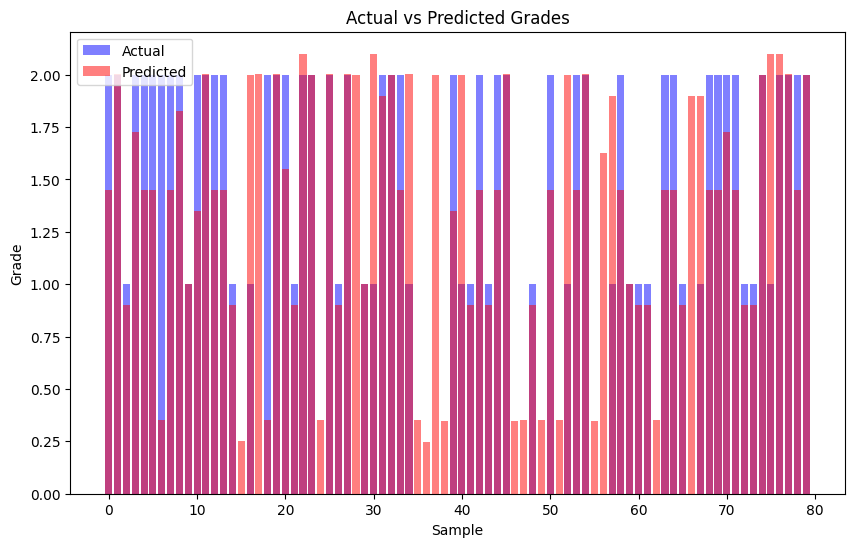

Training Time: 0.051839351654052734 seconds
Testing Time: 0.0 seconds


In [19]:
import time
import matplotlib.pyplot as plt
import numpy as np

# Measure training time
start_time = time.time()
svm_model.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure testing time
start_time = time.time()
y_pred = svm_model.predict(X_test)
testing_time = time.time() - start_time

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared (R^2) Value:", r2)

# Calculate accuracy metrics
accuracy_rmse = 1 / rmse
accuracy_r2 = r2

# Weighted average of both accuracy measures (adjust weights as needed)
accuracy = (accuracy_rmse + accuracy_r2) / 2
print("Accuracy:", accuracy)

# Plotting accuracy graph
plt.figure(figsize=(10, 6))
plt.bar(range(len(y_test)), y_test, color='blue', alpha=0.5, label='Actual')
plt.bar(range(len(y_pred)), y_pred, color='red', alpha=0.5, label='Predicted')
plt.title('Actual vs Predicted Grades')
plt.xlabel('Sample')
plt.ylabel('Grade')
plt.legend()
plt.show()

# Print training and testing time
print("Training Time:", training_time, "seconds")
print("Testing Time:", testing_time, "seconds")


## Using Lasso Regrassion

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error,r2_score

# Assuming df is your DataFrame with features and target variable

# Split the data into features (X) and target variable (y)
X = df1.drop('Grade', axis=1)  # Features
y = df1['Grade']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Lasso Regression model
lasso_model = Lasso(alpha=0.1)  # You can adjust the alpha parameter
lasso_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lasso_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared (R^2) Value:", r2)


accuracy_rmse = 1 / rmse
accuracy_r2 = r2
    
    # Weighted average of both accuracy measures (adjust weights as needed)
accuracy_lasso = (accuracy_rmse + accuracy_r2) / 2
print("Accuracy:", accuracy_lasso)

Mean Squared Error: 0.46550423782684114
Root Mean Squared Error (RMSE): 0.6822787097857013
R-squared (R^2) Value: 0.2428901849830284
Accuracy: 0.8542834367468206


Mean Squared Error: 0.46550423782684114
Root Mean Squared Error (RMSE): 0.6822787097857013
R-squared (R^2) Value: 0.2428901849830284
Accuracy: 0.8542834367468206


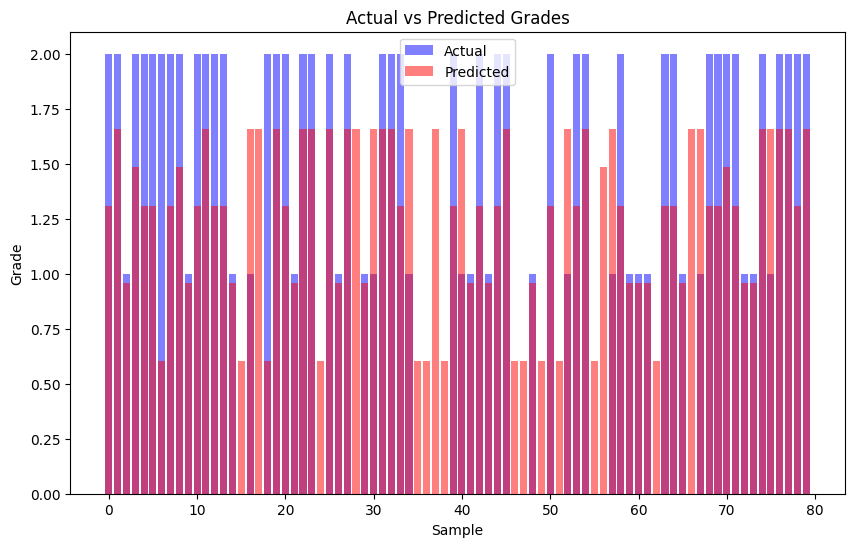

Training Time: 0.007996797561645508 seconds
Testing Time: 0.0 seconds


In [21]:
import time
import matplotlib.pyplot as plt

# Measure training time
start_time = time.time()
lasso_model.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure testing time
start_time = time.time()
y_pred = lasso_model.predict(X_test)
testing_time = time.time() - start_time

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared (R^2) Value:", r2)

# Calculate accuracy metrics
accuracy_rmse = 1 / rmse
accuracy_r2 = r2

# Weighted average of both accuracy measures (adjust weights as needed)
accuracy = (accuracy_rmse + accuracy_r2) / 2
print("Accuracy:", accuracy)

# Plotting accuracy graph
plt.figure(figsize=(10, 6))
plt.bar(range(len(y_test)), y_test, color='blue', alpha=0.5, label='Actual')
plt.bar(range(len(y_pred)), y_pred, color='red', alpha=0.5, label='Predicted')
plt.title('Actual vs Predicted Grades')
plt.xlabel('Sample')
plt.ylabel('Grade')
plt.legend()
plt.show()

# Print training and testing time
print("Training Time:", training_time, "seconds")
print("Testing Time:", testing_time, "seconds")

## Using Linear Regrassion

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
# Assuming df is your DataFrame

# Prepare the data
X = df1.drop('Grade', axis=1)  # Features (independent variables)
y = df1['Grade']                # Target variable (dependent variable)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared (R^2) Value:", r2)


accuracy_rmse = 1 / rmse
accuracy_r2 = r2
    
    # Weighted average of both accuracy measures (adjust weights as needed)
accuracy_lr = (accuracy_rmse + accuracy_r2) / 2
print("Accuracy:", accuracy_lr)

Mean Squared Error: 0.40752679742028947
Root Mean Squared Error (RMSE): 0.6383782557546032
R-squared (R^2) Value: 0.3371864031791989
Accuracy: 0.9518278990323696


Mean Squared Error: 0.40752679742028947
Root Mean Squared Error (RMSE): 0.6383782557546032
R-squared (R^2) Value: 0.3371864031791989
Accuracy: 0.9518278990323696


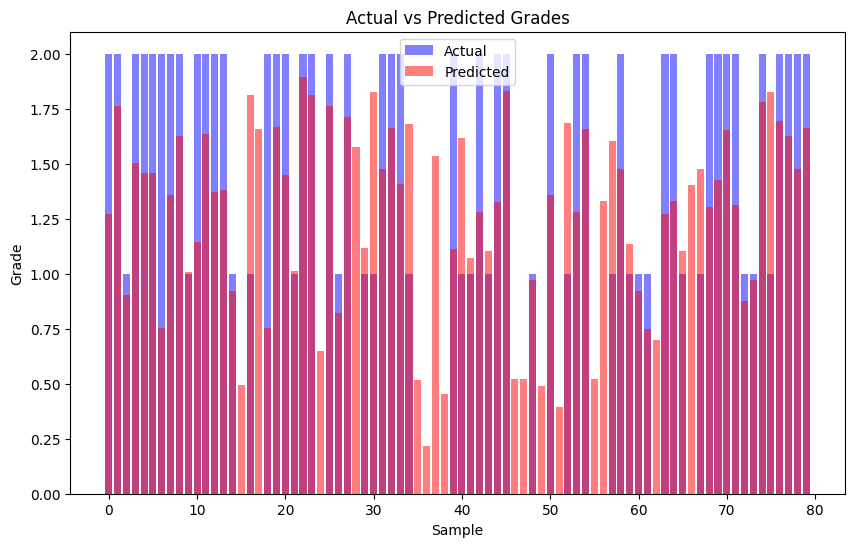

Training Time: 0.0 seconds
Testing Time: 0.010716438293457031 seconds


In [23]:
import time
import matplotlib.pyplot as plt

# Measure training time
start_time = time.time()
model.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure testing time
start_time = time.time()
y_pred = model.predict(X_test)
testing_time = time.time() - start_time

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared (R^2) Value:", r2)

# Calculate accuracy metrics
accuracy_rmse = 1 / rmse
accuracy_r2 = r2

# Weighted average of both accuracy measures (adjust weights as needed)
accuracy = (accuracy_rmse + accuracy_r2) / 2
print("Accuracy:", accuracy)

# Plotting accuracy graph
plt.figure(figsize=(10, 6))
plt.bar(range(len(y_test)), y_test, color='blue', alpha=0.5, label='Actual')
plt.bar(range(len(y_pred)), y_pred, color='red', alpha=0.5, label='Predicted')
plt.title('Actual vs Predicted Grades')
plt.xlabel('Sample')
plt.ylabel('Grade')
plt.legend()
plt.show()

# Print training and testing time
print("Training Time:", training_time, "seconds")
print("Testing Time:", testing_time, "seconds")


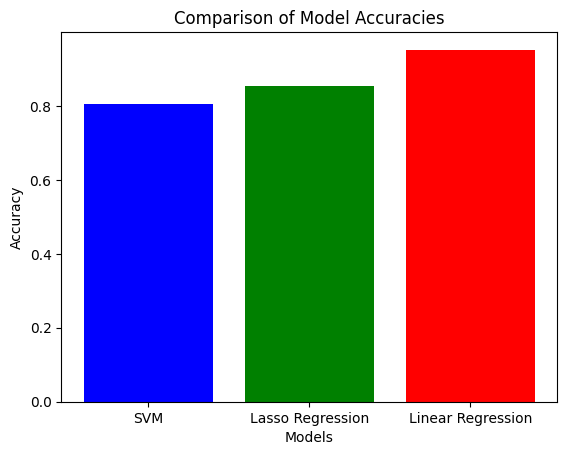

In [24]:
models = ['SVM', 'Lasso Regression', 'Linear Regression']
accuracies = [accuracy_svm, accuracy_lasso, accuracy_lr]

plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.show()


In [ ]:
##### Prediction function
def train_and_predict_grade(df1, features):
    # Prepare the data
    X = df1[features]  # Features
    y = df1['Grade']   # Target variable
    
    
    # Train the model
    model = LinearRegression()
    model.fit(X, y)  # Fit on the entire dataset
    
    # Function to predict Grade based on features
    def predict_grade(features_values):
        return model.predict([features_values])[0]
    
    return predict_grade

# Convert to grade as A, B, C, or D
def convert_to_grade(predicted_grade):
    if predicted_grade > 1:
        return 'A'
    elif predicted_grade < 1.5:
        return 'B'
    elif predicted_grade < 2:
        return 'C'
    else:
        return 'D'

# Example usage:
# Assuming df is the DataFrame containing the data
features = ['Sex', 'High_School_Type', 'Sports_activity', 'Weekly_Study_Hours', 'Attendance', 'Reading', 'Listening_in_Class', 'Project_work']

predict_grade_function = train_and_predict_grade(df1, features)

# User Input function
def predict_student_performance():
    Sex = float(input("Enter your Gender (0 for male, 1 for female): "))
    High_School_Type  = float(input("Enter school Type (0 :Private, 1:State): "))
    Sports_activity = float(input("Enter Sport activity(0:No, 1:Yes ): "))
    Weekly_Study_Hours = float(input("Enter weekly study times(0 to 12): "))
    Attendance = float(input("Attend class (1:Always, 0:Never, 2:Sometimes) :  "))
    Reading = float(input("Have the student read in class (0 for No, 1 for Yes): "))
    Listening_in_Class = float(input("Have the student Listen in class (0 for No, 1 for Yes): "))
    Project_work = float(input("Have the student working  in project (0 for No, 1 for Yes): "))

    # Make prediction
    predicted_grade = predict_grade_function([Sex, High_School_Type, Sports_activity, Weekly_Study_Hours, Attendance, Reading, Listening_in_Class, Project_work])
    grade = convert_to_grade(predicted_grade)

    print("The student is predicted to get grade:", grade)

# Predict for user input
predict_student_performance()


In [ ]:
import pickle

# Assuming 'model' and 'features' are defined
# Open the file for writing in binary mode
with open('Grade_prediction.pickle', 'wb') as f:
    # Use pickle.dump() to serialize the 'model' and 'features' objects to the file
    pickle.dump((model, features), f)
